# ER図

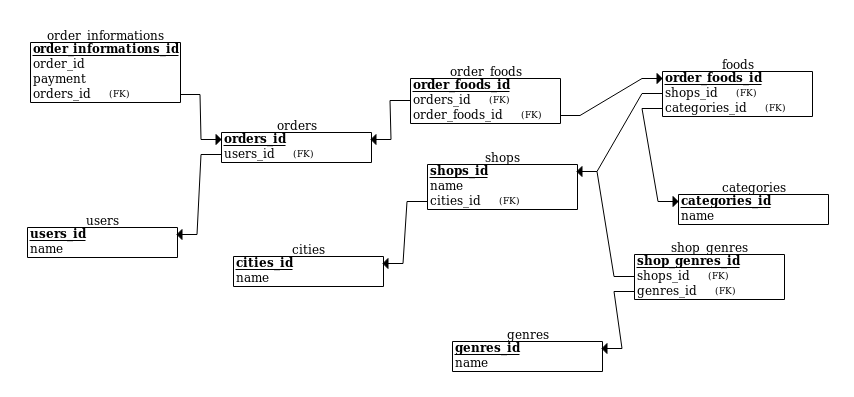

In [1]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("erdplus-diagram.png"))

# Question

## user_id 1のuserが注文した件数

SELECT * <br>
FROM orders <br>
WHERE user_id=1; <br>

796件

## 最後に注文したuserの名前

SELECT name <br>
FROM users <br>
WHERE id=(<br>
    SELECT user_id <br>
    FROM orders <br>
    WHERE id=( <br>
    SELECT MAX(id) FROM orders <br>
    ) <br>
); <br>

## cityの名称一覧(id, nameのみ出力)

SELECT id, name <br>
FROM cities;

## 渋谷区のshop一覧取得

SELECT * <br>
FROM shops <br>
WHERE city_id=( <br>
    SELECT id <br>
    FROM cities <br>
    WHERE name LIKE ‘渋谷区’ <br>
    );

## 1のuserが注文した料理一覧を取得

SELECT name <br>
FROM foods <br>
JOIN order_foods <br>
ON foods.id=order_foods.food_id <br>
JOIN orders <br>
ON orders.id=order_foods.order_id <br>
WHERE orders.user_id=1; <br>

## 1のuserが注文した料理の合計金額を取得

SELECT SUM(price) <br>
FROM foods <br>
JOIN order_foods <br>
ON foods.id=order_foods.food_id <br>
JOIN orders <br>
ON orders.id=order_foods.order_id <br>
WHERE orders.user_id=1; <br>
<br>
1081000 <br>

## 全てのuserの注文金額をそれぞれ取得

SELECT SUM(price) <br>
FROM foods <br>
JOIN order_foods <br>
ON foods.id=order_foods.food_id <br>
JOIN orders <br>
ON orders.id=order_foods.order_id <br>
GROUP BY orders.user_id; <br>

## 全てのuserの注文金額が高い順に並び替えて名前と金額を取得

SELECT SUM(price), users.name <br>
FROM foods <br>
JOIN order_foods <br>
ON foods.id=order_foods.food_id <br>
JOIN orders <br>
ON orders.id=order_foods.order_id <br>
GROUP BY orders.user_id, users.name <br>
ORDER BY SUM(price) DECS <br>
;

## category別の商品一覧を取得

SELECT categories.name, foods.name <br>
FROM categories <br>
JOIN foods <br>
ON foods.category_id=categories.id <br>
GROUP BY categories.name, foods.name <br>
ORDER BY categories.name DESC <br>
; <br>

## userの名前に"a"が含まれる人を出力

SELECT name <br>
FROM users <br>
WHERE name <br>
LIKE ‘%a%’ <br>
; <br>
<br>
“Gretchen Quigley” <br>
“Celestino Roob” <br>
“Dameon Runolfsdottir” <br>
“Mrs. Bennett Hirthe” <br>

## userのidが5以下の人たち

SELECT name <br>
FROM users <br>
WHERE id<5 <br>
; <br>
<br>
“Gretchen Quigley” <br>
“Celestino Roob” <br>
“Dameon Runolfsdottir” <br>
“Mrs. Bennett Hirthe” <br>

## 注文をしたuserの中で注文数が多い順に5人限定で並べる

SELECT COUNT(orders.user_id), users.name <br>
FROM users <br>
JOIN orders <br>
ON orders.user_id=users.id <br>
GROUP BY orders.user_id, users.name <br>
ORDER BY COUNT(orders.user_id) DESC <br>
OFFSET 0 LIMIT 5 <br>
;<br>
<br>
847,“Miracle Stiedemann” <br>
840,“Lemuel Friesen” <br>
836,“Beau Simonis” <br>
834,“Gregory Rolfson III” <br>
833,“Ms. Jo Lemke” <br>

# バックアップコマンド
psql restore < dumpfile